In [28]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
from scipy import stats

In [4]:
data = pd.read_csv('cleaneddata.csv')

In [5]:
data

,age,bmi,charges,children,is_east,is_north,sex,smoker
0,19,27.900,16884.92400,0,0,0,0,1
1,18,33.770,1725.55230,1,1,0,1,0
2,28,33.000,4449.46200,3,1,0,1,0
3,33,22.705,21984.47061,0,0,1,1,0
4,32,28.880,3866.85520,0,0,1,1,0
...,...,...,...,...,...,...,...,...
1332,50,30.970,10600.54830,3,0,1,1,0
1333,18,31.920,2205.98080,0,1,1,0,0
1334,18,36.850,1629.83350,0,1,0,0,0
1335,21,25.800,2007.94500,0,0,0,0,0


In [6]:
data.isna().sum()

age         0
bmi         0
charges     0
children    0
is_east     0
is_north    0
sex         0
smoker      0
dtype: int64

In [7]:
data.dtypes

age           int64
bmi         float64
charges     float64
children      int64
is_east       int64
is_north      int64
sex           int64
smoker        int64
dtype: object

<Axes: xlabel='age', ylabel='charges'>

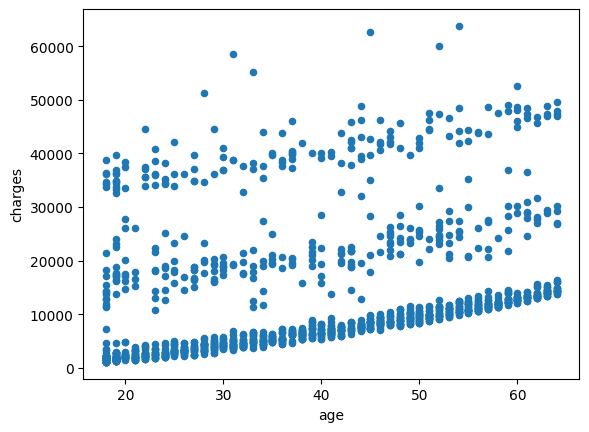

In [8]:
data[['age', 'charges']].plot.scatter('age','charges')

<Axes: xlabel='bmi', ylabel='charges'>

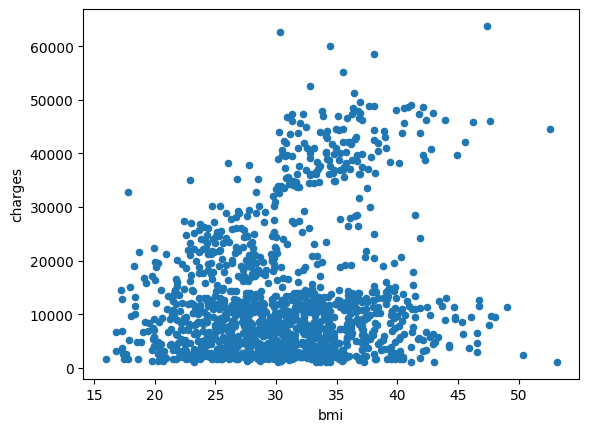

In [9]:
data[['bmi', 'charges']].plot.scatter('bmi','charges')

<Axes: xlabel='children', ylabel='charges'>

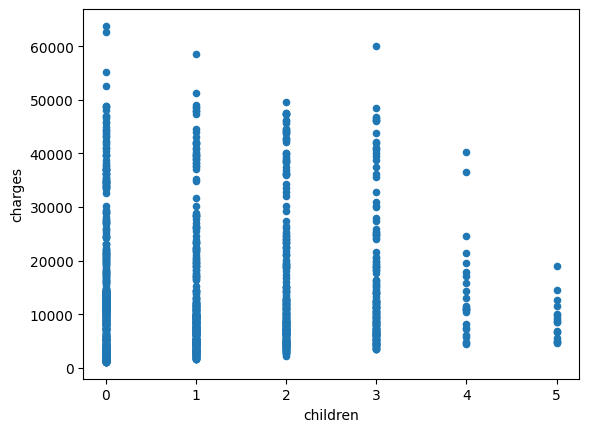

In [10]:
data[['children', 'charges']].plot.scatter('children','charges')

<Axes: xlabel='sex', ylabel='charges'>

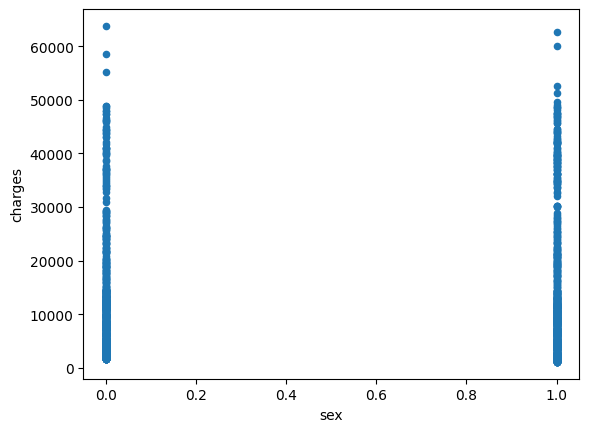

In [11]:
data[['sex', 'charges']].plot.scatter('sex','charges')

<Axes: xlabel='smoker', ylabel='charges'>

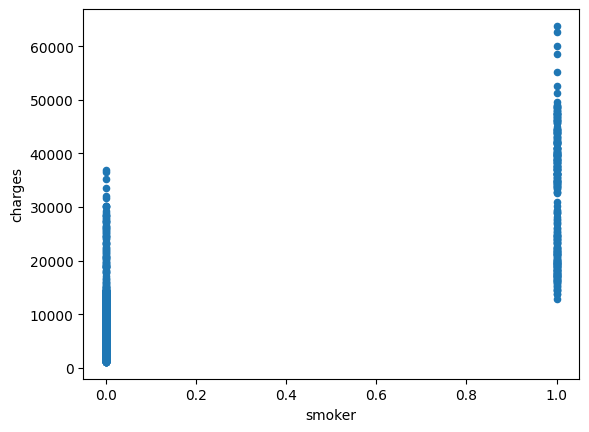

In [12]:
data[['smoker', 'charges']].plot.scatter('smoker','charges')

<Axes: xlabel='is_north', ylabel='charges'>

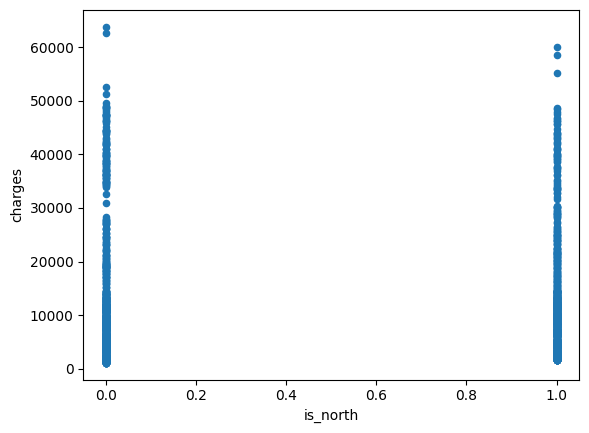

In [13]:
data[['is_north', 'charges']].plot.scatter('is_north','charges')

<Axes: xlabel='is_east', ylabel='charges'>

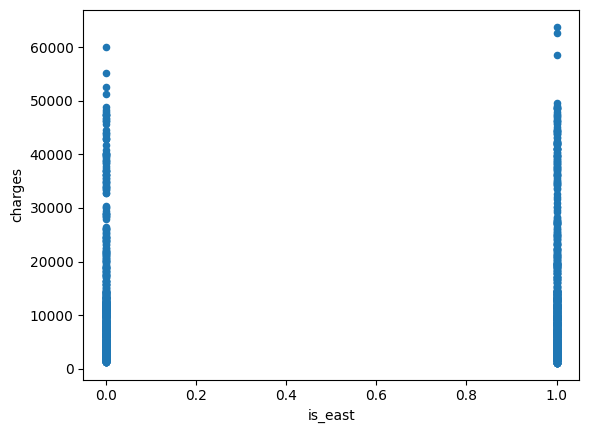

In [14]:
data[['is_east', 'charges']].plot.scatter('is_east','charges')

In [15]:
data.corr(method='pearson')

,age,bmi,charges,children,is_east,is_north,sex,smoker
age,1.000000,0.109344,0.298308,0.041536,-0.009363,0.002884,-0.019814,-0.025587
bmi,0.109344,1.000000,0.198401,0.012755,0.122050,-0.235197,0.046397,0.003746
charges,0.298308,0.198401,1.000000,0.067389,0.070627,-0.028079,0.058044,0.787234
children,0.041536,0.012755,0.067389,1.000000,-0.040814,0.002437,0.017848,0.007331
is_east,-0.009363,0.122050,0.070627,-0.040814,1.000000,-0.028301,0.013934,0.063040
is_north,0.002884,-0.235197,-0.028079,0.002437,-0.028301,1.000000,-0.012423,-0.028915
sex,-0.019814,0.046397,0.058044,0.017848,0.013934,-0.012423,1.000000,0.076596
smoker,-0.025587,0.003746,0.787234,0.007331,0.063040,-0.028915,0.076596,1.000000


<Axes: xlabel='age', ylabel='charges'>

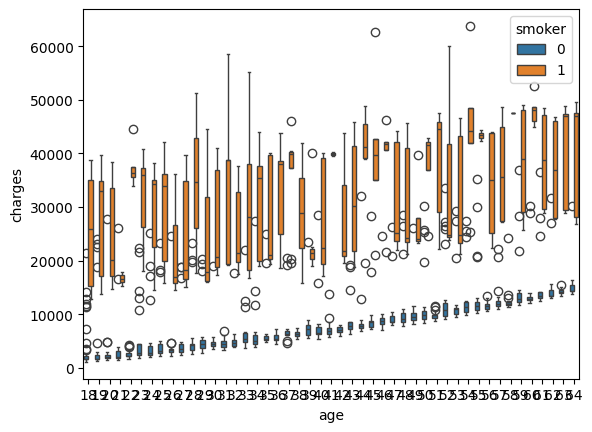

In [16]:
sns.boxplot(data=data, x="age", y="charges", hue="smoker")

<Axes: xlabel='sex', ylabel='charges'>

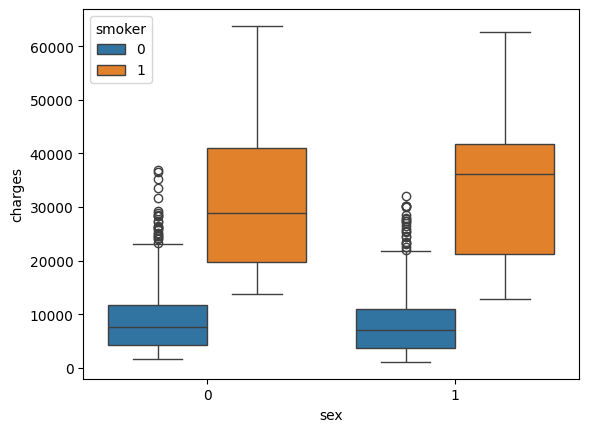

In [17]:
sns.boxplot(data=data, x="sex", y="charges", hue="smoker")

<Axes: xlabel='age', ylabel='charges'>

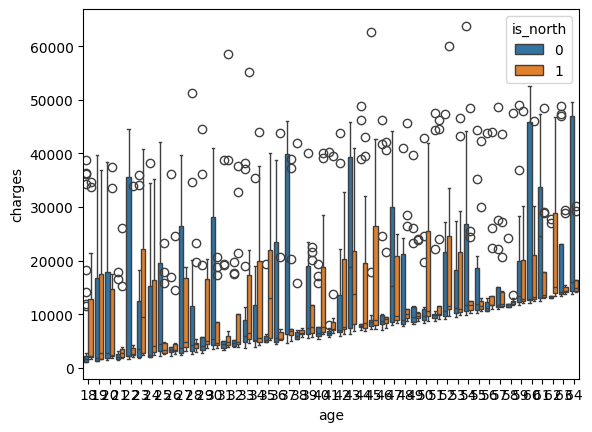

In [18]:
sns.boxplot(data=data, x="age", y="charges", hue="is_north")

<Axes: xlabel='age', ylabel='charges'>

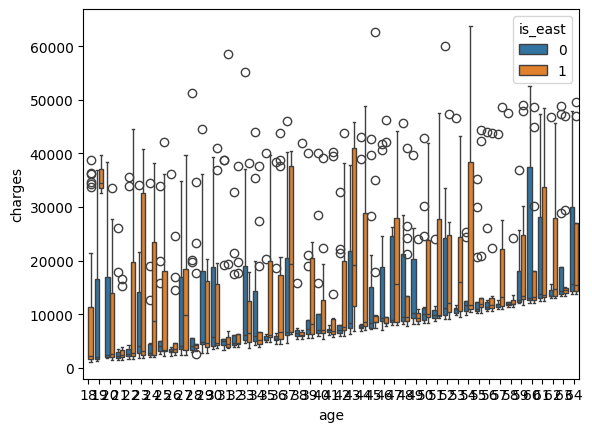

In [19]:
sns.boxplot(data=data, x="age", y="charges", hue="is_east")

In [20]:
agegroupdata = data.sort_values('age')
agegroup1data = agegroupdata[agegroupdata['age'] <= 25]
agegroup2data = agegroupdata[(agegroupdata['age'] <= 34) & (agegroupdata['age'] > 25)]
agegroup3data = agegroupdata[(agegroupdata['age'] <= 44) & (agegroupdata['age'] > 34)]
agegroup4data = agegroupdata[(agegroupdata['age'] <= 54) & (agegroupdata['age'] > 44)]
agegroup5data = agegroupdata[(agegroupdata['age'] <= 64) & (agegroupdata['age'] > 54)]
agegroup6data = agegroupdata[(agegroupdata['age'] > 64)]
agegroup6data

,age,bmi,charges,children,is_east,is_north,sex,smoker


<Axes: xlabel='age', ylabel='charges'>

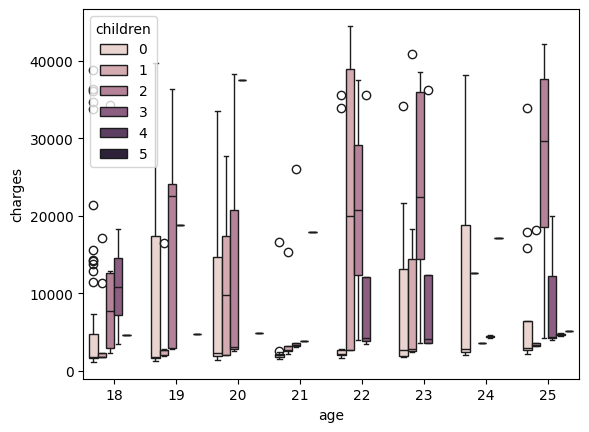

In [21]:
sns.boxplot(data=agegroup1data, x="age", y="charges", hue="children")

<Axes: xlabel='age', ylabel='charges'>

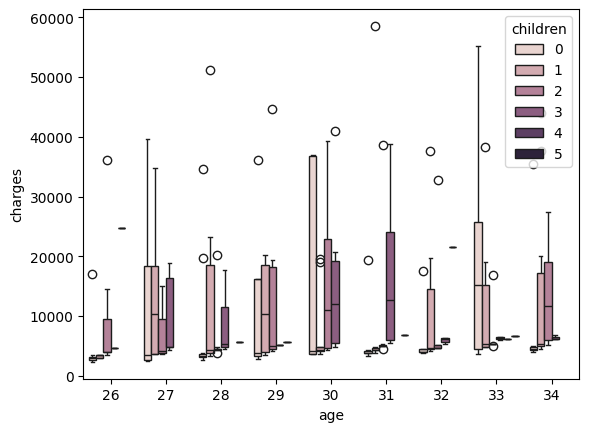

In [22]:
sns.boxplot(data=agegroup2data, x="age", y="charges", hue="children")

<Axes: xlabel='age', ylabel='charges'>

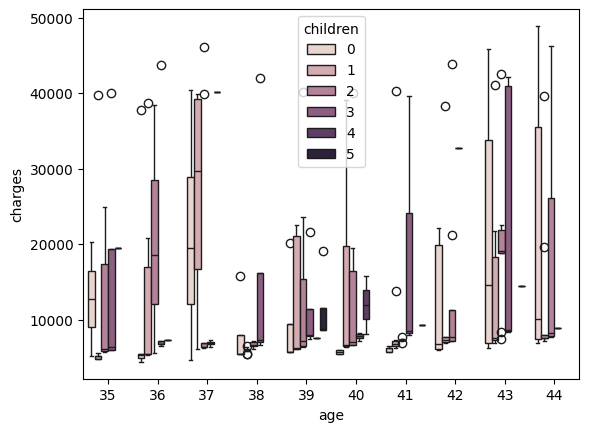

In [23]:
sns.boxplot(data=agegroup3data, x="age", y="charges", hue="children")

<Axes: xlabel='age', ylabel='charges'>

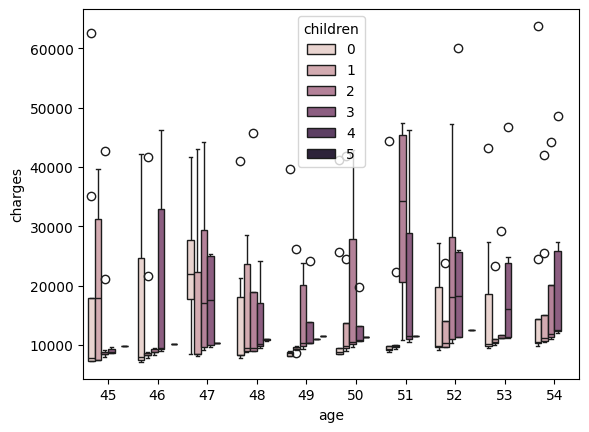

In [24]:
sns.boxplot(data=agegroup4data, x="age", y="charges", hue="children")

<Axes: xlabel='age', ylabel='charges'>

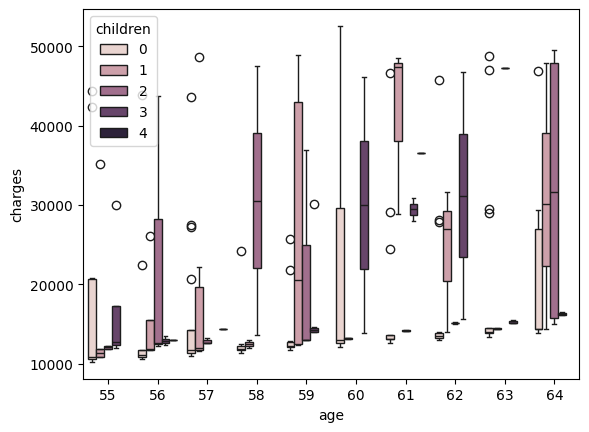

In [25]:
sns.boxplot(data=agegroup5data, x="age", y="charges", hue="children")

In [33]:
smokers = data[data['smoker'] == 1]
nonsmokers = data[data['smoker'] != 1]
stats.ttest_ind(smokers['charges'], nonsmokers['charges'])

TtestResult(statistic=np.float64(46.64479459840305), pvalue=np.float64(1.4067220949376498e-282), df=np.float64(1335.0))

In [40]:
print(smokers.var())
print(nonsmokers.var())

age         1.938551e+02
bmi         3.992526e+01
charges     1.332073e+08
children    1.338801e+00
is_east     2.450202e-01
is_north    2.489907e-01
sex         2.444453e-01
smoker      0.000000e+00
dtype: float64
age         1.981375e+02
bmi         3.655358e+01
charges     3.591573e+07
children    1.484132e+00
is_east     2.502334e-01
is_north    2.501714e-01
sex         2.500226e-01
smoker      0.000000e+00
dtype: float64


In [36]:
old = data[data['age'] > 50]
young = data[data['age']< 50]
stats.ttest_ind(old['charges'], young['charges'])

TtestResult(statistic=np.float64(9.130972652931737), pvalue=np.float64(2.509384016755068e-19), df=np.float64(1306.0))

In [37]:
man = data[data['sex'] == 1]
woman = data[data['sex'] != 1]
stats.ttest_ind(man['charges'], woman['charges'])

TtestResult(statistic=np.float64(2.124391307062026), pvalue=np.float64(0.0338207919951195), df=np.float64(1335.0))

In [38]:
north = data[data['is_north'] == 1]
south = data[data['is_north'] != 1]
stats.ttest_ind(north['charges'], south['charges'])

TtestResult(statistic=np.float64(-1.026346878443171), pvalue=np.float64(0.30491403428254554), df=np.float64(1335.0))

In [35]:
maxkids = data[data['children'] == 5]
notmaxkids = data[data['children'] != 5]
stats.ttest_ind(maxkids['charges'], notmaxkids['charges'])

TtestResult(statistic=np.float64(-1.5856716753692235), pvalue=np.float64(0.11305063160882751), df=np.float64(1335.0))

In [43]:
kids = data[data['children'] != 0]
nokids = data[data['children'] == 0]
stats.ttest_ind(maxkids['charges'], nokids['charges'])

TtestResult(statistic=np.float64(2.342674957951972), pvalue=np.float64(0.019292282503621135), df=np.float64(1335.0))

In [44]:
print(kids.var())
print(nokids.var())

age         1.422609e+02
bmi         3.775828e+01
charges     1.473385e+08
children    9.669790e-01
is_east     2.503208e-01
is_north    2.500806e-01
sex         2.501887e-01
smoker      1.650192e-01
dtype: float64
age         2.699598e+02
bmi         3.653456e+01
charges     1.446108e+08
children    0.000000e+00
is_east     2.495027e-01
is_north    2.502166e-01
sex         2.504180e-01
smoker      1.606988e-01
dtype: float64


In [41]:
fat = data[data['bmi'] >= 25]
notfat = data[data['bmi']<25]
stats.ttest_ind(fat['charges'], notfat['charges'])

TtestResult(statistic=np.float64(4.314158202360991), pvalue=np.float64(1.7201213270972555e-05), df=np.float64(1335.0))